In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import h5py
from numpy import *
import numpy as np
from scipy import stats
from bar_funcs import *

Unable to import [unsiotools.py_unstools]....


In [2]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 15

#### Galáxia barrada

Snapshot final

In [3]:
snapshot = 'satelites/sat05-30/snapshot_120.hdf5'
#snapshot = 'barrada/snapshot_280.hdf5'

f = h5py.File(snapshot, 'r')

print(list(f.keys()))
print(f['Header'].attrs['Time'])

['Config', 'Header', 'Parameters', 'PartType1', 'PartType2', 'PartType3', 'PartType5']
6.0


In [4]:
# f_gas = f['PartType0']
#f_dm = f['PartType1']
f_disk = f['PartType2']
# f_bulge = f['PartType3']
# f_star = f['PartType4']
# f_bndry = f['PartType5']

In [5]:
print(list(f_disk.keys()))

['Coordinates', 'Masses', 'ParticleIDs', 'Velocities']


In [6]:
x_disk = np.array(f_disk['Coordinates'][:,0])
y_disk = np.array(f_disk['Coordinates'][:,1])
z_disk = np.array(f_disk['Coordinates'][:,2])
m_disk = np.array(f_disk['Masses'])
id = np.array(f_disk['ParticleIDs'])
vx_disk = np.array(f_disk['Velocities'][:,0])
vy_disk = np.array(f_disk['Velocities'][:,1])
vz_disk = np.array(f_disk['Velocities'][:,2])
Ndisk = len(np.array(f_disk['ParticleIDs']))

In [7]:
x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)
                
theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                               vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
        
x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                          vy=vy_new_disk, theta=theta)
       
x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

In [8]:
R = np.sqrt(x**2 + y**2)

In [9]:
cond1 = np.argwhere((R > 15.0) & (R < 35.0) & ((z > 5.0) | (z < -5.0))).flatten()
ids_warp = id[cond1]
print(ids_warp)
len(ids_warp)

[1125326 1195123 1199954 ... 1090600 1059173 1090899]


2484

In [10]:
x_warp = []
y_warp = []
z_warp = []

for i in ids_warp:
    x_warp.append(x[id==i][0])
    y_warp.append(y[id==i][0])
    z_warp.append(z[id==i][0])

In [11]:
x_warp_ = np.array(x_warp)
y_warp_ = np.array(y_warp)
r = np.sqrt(x_warp_**2 + y_warp_**2)
mean_r = np.mean(r)
std_r = np.std(r)
print(mean_r, std_r)

21.474403 4.1155624


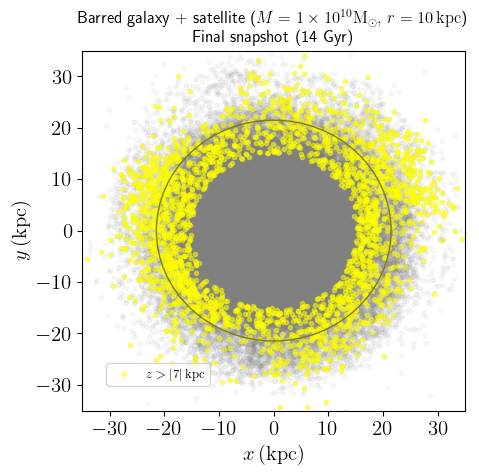

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x, y, marker='.', alpha=0.05, color='grey')
plt.scatter(x_warp, y_warp, label= '$z > |7| \, \mathrm{kpc}$', marker='.', alpha=0.5, color='yellow')
circle = Circle((0, 0), mean_r, linewidth=1, color='olive', fill=False)
ax.add_patch(circle)
plt.xlabel('$x \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$y \, \mathrm{(kpc)}$', fontsize=15)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xticks([-30, -20, -10, 0, 10, 20, 30])
plt.legend(frameon=True, fontsize=9, loc="center right", bbox_to_anchor=(0.35,0.1))
plt.title('Barred galaxy + satellite ' + r'($M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$)' + '\n Final snapshot (14 Gyr)', fontsize=12)
#plt.title('Barred galaxy' + '\n Final snapshot (14 Gyr)', fontsize=12)
plt.tight_layout()
#plt.savefig('raio.png')

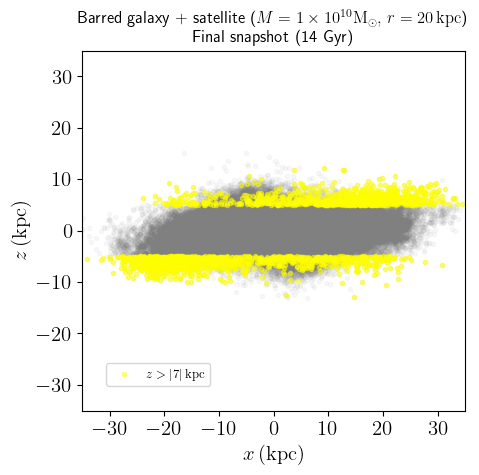

In [13]:
plt.figure(figsize=[5,5])#, dpi=300)

plt.scatter(x, z, marker='.', alpha=0.05, color='grey')
plt.scatter(x_warp, z_warp, label= '$z > |7| \, \mathrm{kpc}$', marker='.', alpha=0.5, color='yellow')
plt.xlabel('$x \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$z \, \mathrm{(kpc)}$', fontsize=15)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xticks([-30, -20, -10, 0, 10, 20, 30])
plt.legend(frameon=True, fontsize=9, loc="center right", bbox_to_anchor=(0.35,0.1))
plt.title('Barred galaxy + satellite ' + r'($M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$)' + '\n Final snapshot (14 Gyr)', fontsize=12)
#plt.title('Barred galaxy' + '\n Final snapshot (14 Gyr)', fontsize=12)
plt.tight_layout()
#plt.savefig('pos_warp_final_b_2.png')

Snapshot inicial

In [14]:
snapshot = 'satelites/sat05-30/snapshot_000.hdf5'
#snapshot = 'barrada/snapshot_160.hdf5'

f = h5py.File(snapshot, 'r')

print(list(f.keys()))
print(f['Header'].attrs['Time'])

f_disk = f['PartType2']

x_disk = np.array(f_disk['Coordinates'][:,0])
y_disk = np.array(f_disk['Coordinates'][:,1])
z_disk = np.array(f_disk['Coordinates'][:,2])
m_disk = np.array(f_disk['Masses'])
id = np.array(f_disk['ParticleIDs'])
vx_disk = np.array(f_disk['Velocities'][:,0])
vy_disk = np.array(f_disk['Velocities'][:,1])
vz_disk = np.array(f_disk['Velocities'][:,2])
Ndisk = len(np.array(f_disk['ParticleIDs']))

x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)
                
theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                               vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
        
x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                          vy=vy_new_disk, theta=theta)
       
x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)

['Config', 'Header', 'Parameters', 'PartType1', 'PartType2', 'PartType3', 'PartType5']
0.0


In [15]:
x_warp_ini = []
y_warp_ini = []
z_warp_ini = []

for i in ids_warp:
    x_warp_ini.append(x[id==i][0])
    y_warp_ini.append(y[id==i][0])
    z_warp_ini.append(z[id==i][0])

In [16]:
x_warp_ini_ = np.array(x_warp_ini)
y_warp_ini_ = np.array(y_warp_ini)
r_ini = np.sqrt(x_warp_ini_**2 + y_warp_ini_**2)
mean_r_ini = np.mean(r_ini)
std_r_ini = np.std(r_ini)
print(mean_r_ini, std_r_ini)

17.617184 3.7146423


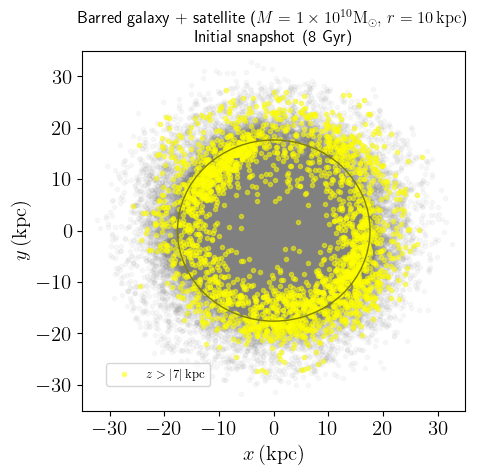

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x, y, marker='.', alpha=0.05, color='grey')
plt.scatter(x_warp_ini, y_warp_ini, label= '$z > |7| \, \mathrm{kpc}$', marker='.', alpha=0.5, color='yellow')
circle = Circle((0, 0), mean_r_ini, linewidth=1, color='olive', fill=False)
ax.add_patch(circle)
plt.xlabel('$x \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$y \, \mathrm{(kpc)}$', fontsize=15)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xticks([-30, -20, -10, 0, 10, 20, 30])
plt.legend(frameon=True, fontsize=9, loc="center right", bbox_to_anchor=(0.35,0.1))
plt.title('Barred galaxy + satellite ' + r'($M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$)' + '\n Initial snapshot (8 Gyr)', fontsize=12)
#plt.title('Barred galaxy' + '\n (8 Gyr)', fontsize=12)
plt.tight_layout()
#plt.savefig('raio_ini.png')

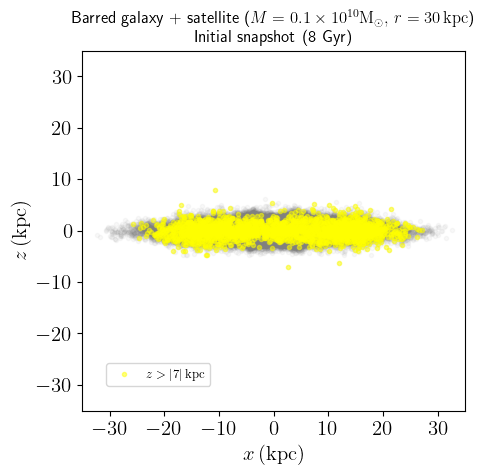

In [17]:
plt.figure(figsize=[5,5])#, dpi=300)

plt.scatter(x, z, marker='.', alpha=0.05, color='grey')
plt.scatter(x_warp_ini, z_warp_ini, label= '$z > |7| \, \mathrm{kpc}$', marker='.', alpha=0.5, color='yellow')
plt.xlabel('$x \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$z \, \mathrm{(kpc)}$', fontsize=15)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xticks([-30, -20, -10, 0, 10, 20, 30])
plt.legend(frameon=True, fontsize=9, loc="center right", bbox_to_anchor=(0.35,0.1))
plt.title('Barred galaxy + satellite ' + r'($M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$)' + '\n Initial snapshot (8 Gyr)', fontsize=12)
#plt.title('Barred galaxy' + '\n (8 Gyr)', fontsize=12)
plt.tight_layout()
#plt.savefig('pos_warp_ini_b_2_.png')

______________

#### Galáxia não barrada

Snapshot final

In [21]:
snapshot = 'satelites/nb-sat1-30/snapshot_120.hdf5'
#snapshot = 'n_barrada/snapshot_280.hdf5'

f = h5py.File(snapshot, 'r')

print(list(f.keys()))
print(f['Header'].attrs['Time'])

['Config', 'Header', 'Parameters', 'PartType0', 'PartType1', 'PartType2', 'PartType3', 'PartType4', 'PartType5']
6.0


In [22]:
# f_gas = f['PartType0']
#f_dm = f['PartType1']
f_disk = f['PartType2']
# f_bulge = f['PartType3']
f_star = f['PartType4']
# f_bndry = f['PartType5']

In [23]:
x_disk = np.array(f_disk['Coordinates'][:,0])
y_disk = np.array(f_disk['Coordinates'][:,1])
z_disk = np.array(f_disk['Coordinates'][:,2])
m_disk = np.array(f_disk['Masses'])
id_disk = np.array(f_disk['ParticleIDs'])
vx_disk = np.array(f_disk['Velocities'][:,0])
vy_disk = np.array(f_disk['Velocities'][:,1])
vz_disk = np.array(f_disk['Velocities'][:,2])
Ndisk = len(np.array(f_disk['ParticleIDs']))

x_star = np.array(f_star['Coordinates'][:,0])
y_star = np.array(f_star['Coordinates'][:,1])
z_star = np.array(f_star['Coordinates'][:,2])
m_star = np.array(f_star['Masses'])
id_star = np.array(f_star['ParticleIDs'])
vx_star = np.array(f_star['Velocities'][:,0])
vy_star = np.array(f_star['Velocities'][:,1])
vz_star = np.array(f_star['Velocities'][:,2])
Nstar = len(np.array(f_star['ParticleIDs']))

In [24]:
#corrigir posição - centro de massa - disk
x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

#corrigir posição - momento angular - disk
theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                           vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    
x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                      vy=vy_new_disk, theta=theta)
   
x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)
    
#corrigir posição - centro de massa - stars
x_new_star, y_new_star, z_new_star = shift_com(m_star, x_star, y_star, z_star)
vx_new_star, vy_new_star, vz_new_star = shift_com(m_star, vx_star, vy_star, vz_star)

#corrigir posição - momento angular - stars
theta_s, phi_s = theta_phi(N=Nstar, x=x_new_star, y=y_new_star, z=z_new_star, vx=vx_new_star,
                               vy=vy_new_star, vz=vz_new_star, m=m_star)

x_s, y_s, vx_s, vy_s = angular_momentum_1(N=Nstar, x=x_new_star, y=y_new_star, vx=vx_new_star,
                                          vy=vy_new_star, theta=theta_s)

x_s, z_s, vx_s, vz_s = angular_momentum_2(N=Nstar, x=x_s, z=z_new_star, vx=vx_s, vz=vz_new_star,
                                                  phi=phi_s)
    
#juntar componentes
x_tot = np.concatenate((x, x_s))
y_tot = np.concatenate((y, y_s))
z_tot = np.concatenate((z, z_s))
vx_tot = np.concatenate((vx, vx_s))
vy_tot = np.concatenate((vy, vy_s))
vz_tot = np.concatenate((vz, vz_s))
m_tot = np.concatenate((m_disk, m_star))
id_tot = np.concatenate((id_disk, id_star))

In [25]:
R = np.sqrt(x_tot**2 + y_tot**2)

In [27]:
cond1 = np.argwhere((R > 15.0) & (R < 35.0) & ((z_tot > 7.0) | (z_tot < -7.0))).flatten()
ids_warp = id_tot[cond1]
#print(ids_warp)
len(ids_warp)

5363

In [28]:
x_warp = []
y_warp = []
z_warp = []

for i in ids_warp:
    x_warp.append(x_tot[id_tot==i][0])
    y_warp.append(y_tot[id_tot==i][0])
    z_warp.append(z_tot[id_tot==i][0])

In [29]:
x_warp_ = np.array(x_warp)
y_warp_ = np.array(y_warp)
r = np.sqrt(x_warp_**2 + y_warp_**2)
mean_r = np.mean(r)
std_r = np.std(r)
print(mean_r, std_r)

21.70134 4.61355


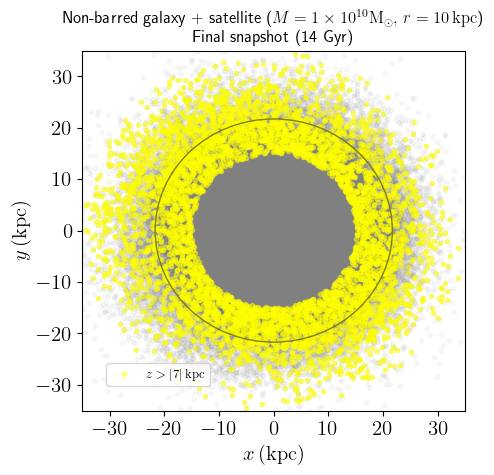

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x_tot, y_tot, marker='.', alpha=0.05, color='grey')
plt.scatter(x_warp, y_warp, label= '$z > |7| \, \mathrm{kpc}$', marker='.', alpha=0.5, color='yellow')
circle = Circle((0, 0), mean_r, linewidth=1, color='olive', fill=False)
ax.add_patch(circle)
plt.xlabel('$x \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$y \, \mathrm{(kpc)}$', fontsize=15)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xticks([-30, -20, -10, 0, 10, 20, 30])
plt.legend(frameon=True, fontsize=9, loc="center right", bbox_to_anchor=(0.35,0.1))
plt.title('Non-barred galaxy + satellite ' + r'($M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$)' + '\n Final snapshot (14 Gyr)', fontsize=12)
#plt.title('Barred galaxy' + '\n Final snapshot (14 Gyr)', fontsize=12)
plt.tight_layout()
#plt.savefig('raio_nb.png')

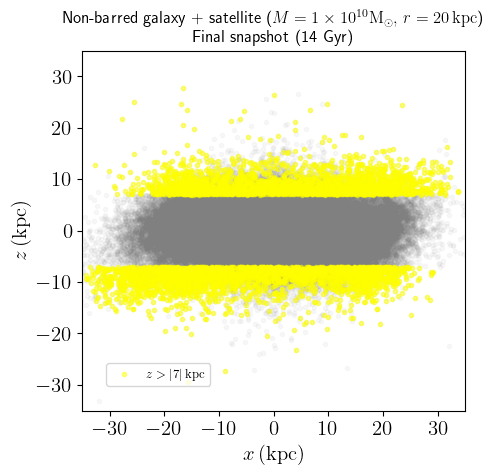

In [31]:
plt.figure(figsize=[5,5])#, dpi=300)
plt.scatter(x_tot, z_tot, marker='.', alpha=0.05, color='grey')
plt.scatter(x_warp, z_warp, label= '$z > |7| \, \mathrm{kpc}$', marker='.', alpha=0.5, color='yellow')
plt.xlabel('$x \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$z \, \mathrm{(kpc)}$', fontsize=15)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xticks([-30, -20, -10, 0, 10, 20, 30])
plt.legend(frameon=True, fontsize=9, loc="center right", bbox_to_anchor=(0.35,0.1))
plt.title('Non-barred galaxy + satellite ' + r'($M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 20 \, \mathrm{kpc}$)' + '\n Final snapshot (14 Gyr)', fontsize=12)
#plt.title('Barred galaxy' + '\n Final snapshot (14 Gyr)', fontsize=12)
plt.tight_layout()
#plt.savefig('pos_warp_final_b_2.png')

Snapshot inicial

In [32]:
snapshot = 'satelites/nb-sat1-30/snapshot_000.hdf5'
#snapshot = 'n_barrada/snapshot_001.hdf5'

f = h5py.File(snapshot, 'r')

print(list(f.keys()))
print(f['Header'].attrs['Time'])

f_disk = f['PartType2']

x_disk = np.array(f_disk['Coordinates'][:,0])
y_disk = np.array(f_disk['Coordinates'][:,1])
z_disk = np.array(f_disk['Coordinates'][:,2])
m_disk = np.array(f_disk['Masses'])
id_disk = np.array(f_disk['ParticleIDs'])
vx_disk = np.array(f_disk['Velocities'][:,0])
vy_disk = np.array(f_disk['Velocities'][:,1])
vz_disk = np.array(f_disk['Velocities'][:,2])
Ndisk = len(np.array(f_disk['ParticleIDs']))

f_star = f['PartType4']

x_star = np.array(f_star['Coordinates'][:,0])
y_star = np.array(f_star['Coordinates'][:,1])
z_star = np.array(f_star['Coordinates'][:,2])
m_star = np.array(f_star['Masses'])
id_star = np.array(f_star['ParticleIDs'])
vx_star = np.array(f_star['Velocities'][:,0])
vy_star = np.array(f_star['Velocities'][:,1])
vz_star = np.array(f_star['Velocities'][:,2])
Nstar = len(np.array(f_star['ParticleIDs']))

#corrigir posição - centro de massa - disk
x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
vx_new_disk, vy_new_disk, vz_new_disk = shift_com(m_disk, vx_disk, vy_disk, vz_disk)

#corrigir posição - momento angular - disk
theta, phi = theta_phi(N=Ndisk, x=x_new_disk, y=y_new_disk, z=z_new_disk, vx=vx_new_disk,
                           vy=vy_new_disk, vz=vz_new_disk, m=m_disk)
    
x, y, vx, vy = angular_momentum_1(N=Ndisk, x=x_new_disk, y=y_new_disk, vx=vx_new_disk,
                                      vy=vy_new_disk, theta=theta)
   
x, z, vx, vz = angular_momentum_2(N=Ndisk, x=x, z=z_new_disk, vx=vx, vz=vz_new_disk, phi=phi)
    
#corrigir posição - centro de massa - stars
x_new_star, y_new_star, z_new_star = shift_com(m_star, x_star, y_star, z_star)
vx_new_star, vy_new_star, vz_new_star = shift_com(m_star, vx_star, vy_star, vz_star)

#corrigir posição - momento angular - stars
theta_s, phi_s = theta_phi(N=Nstar, x=x_new_star, y=y_new_star, z=z_new_star, vx=vx_new_star,
                               vy=vy_new_star, vz=vz_new_star, m=m_star)

x_s, y_s, vx_s, vy_s = angular_momentum_1(N=Nstar, x=x_new_star, y=y_new_star, vx=vx_new_star,
                                          vy=vy_new_star, theta=theta_s)

x_s, z_s, vx_s, vz_s = angular_momentum_2(N=Nstar, x=x_s, z=z_new_star, vx=vx_s, vz=vz_new_star,
                                                  phi=phi_s)

#juntar componentes
x_tot = np.concatenate((x, x_s))
y_tot = np.concatenate((y, y_s))
z_tot = np.concatenate((z, z_s))
vx_tot = np.concatenate((vx, vx_s))
vy_tot = np.concatenate((vy, vy_s))
vz_tot = np.concatenate((vz, vz_s))
m_tot = np.concatenate((m_disk, m_star))
id_tot = np.concatenate((id_disk, id_star))

['Config', 'Header', 'Parameters', 'PartType0', 'PartType1', 'PartType2', 'PartType3', 'PartType4', 'PartType5']
0.0


In [33]:
x_warp_ini = []
y_warp_ini = []
z_warp_ini = []

for i in ids_warp:
    x_warp_ini.append(x_tot[id_tot==i][0])
    y_warp_ini.append(y_tot[id_tot==i][0])
    z_warp_ini.append(z_tot[id_tot==i][0])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [34]:
x_warp_ini_ = np.array(x_warp_ini)
y_warp_ini_ = np.array(y_warp_ini)
r_ini = np.sqrt(x_warp_ini_**2 + y_warp_ini_**2)
mean_r_ini = np.mean(r_ini)
std_r_ini = np.std(r_ini)
print(mean_r_ini, std_r_ini)

17.019539 5.3005805


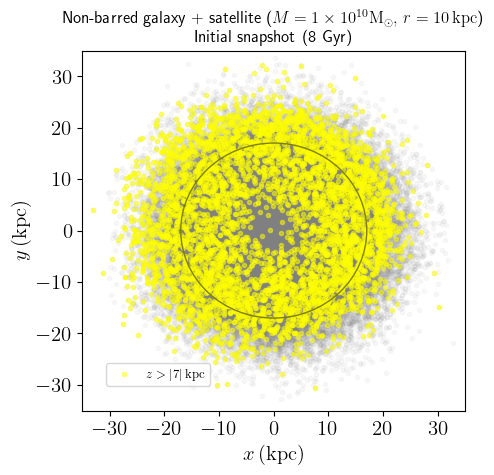

In [35]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(x_tot, y_tot, marker='.', alpha=0.05, color='grey')
plt.scatter(x_warp_ini, y_warp_ini, label= '$z > |7| \, \mathrm{kpc}$', marker='.', alpha=0.5, color='yellow')
circle = Circle((0, 0), mean_r_ini, linewidth=1, color='olive', fill=False)
ax.add_patch(circle)
plt.xlabel('$x \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$y \, \mathrm{(kpc)}$', fontsize=15)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xticks([-30, -20, -10, 0, 10, 20, 30])
plt.legend(frameon=True, fontsize=9, loc="center right", bbox_to_anchor=(0.35,0.1))
plt.title('Non-barred galaxy + satellite ' + r'($M = 1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 10 \, \mathrm{kpc}$)' + '\n Initial snapshot (8 Gyr)', fontsize=12)
#plt.title('Barred galaxy' + '\n (8 Gyr)', fontsize=12)
plt.tight_layout()
#plt.savefig('raio_ini_nb.png')

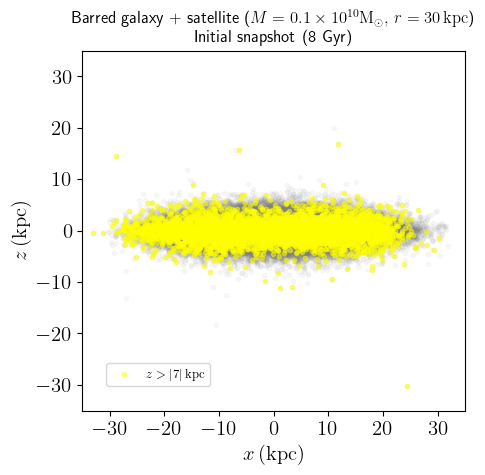

In [36]:
plt.figure(figsize=[5,5])#, dpi=300)

plt.scatter(x_tot, z_tot, marker='.', alpha=0.05, color='grey')
plt.scatter(x_warp_ini, z_warp_ini, label= '$z > |7| \, \mathrm{kpc}$', marker='.', alpha=0.5, color='yellow')
plt.xlabel('$x \, \mathrm{(kpc)}$', fontsize=15)
plt.ylabel('$z \, \mathrm{(kpc)}$', fontsize=15)
plt.xlim(-35, 35)
plt.ylim(-35, 35)
plt.xticks([-30, -20, -10, 0, 10, 20, 30])
plt.legend(frameon=True, fontsize=9, loc="center right", bbox_to_anchor=(0.35,0.1))
plt.title('Barred galaxy + satellite ' + r'($M = 0.1 \times 10^{10}\mathrm{{M}_\odot}, \,r = 30 \, \mathrm{kpc}$)' + '\n Initial snapshot (8 Gyr)', fontsize=12)
#plt.title('Barred galaxy' + '\n (8 Gyr)', fontsize=12)
plt.tight_layout()
#plt.savefig('pos_warp_ini_b_2_.png')

__________

Raios médios

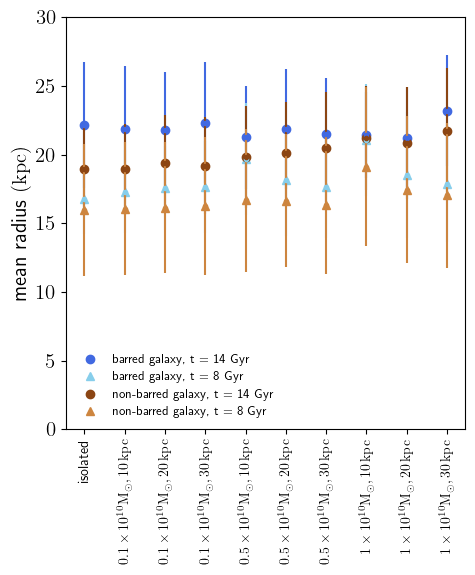

In [70]:
fig, ax = plt.subplots(figsize=(5, 6))

#barrada
m = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r = [22.14, 21.86, 21.82, 22.32, 21.25, 21.85, 21.47, 21.44, 21.21, 23.20]
r_err = [4.58, 4.58, 4.21, 4.39, 3.76, 4.35, 4.12, 3.14, 3.69, 4.05]

r_i = [16.75, 17.29, 17.56, 17.65, 19.67, 18.16, 17.62, 21.08, 18.51, 17.88]
r_i_err = [2.52, 3.02, 3.05, 3.37, 4.05, 4.07, 3.71, 4.07, 4.56, 4.25]

plt.plot(m, r, 'o', color='royalblue', label='barred galaxy, t = 14 Gyr')
plt.errorbar(m, r, yerr=r_err, color='royalblue', fmt='.')
plt.plot(m, r_i, '^', color='skyblue', label='barred galaxy, t = 8 Gyr')
plt.errorbar(m, r_i, yerr=r_i_err, color='skyblue', fmt='.')

#não barrada
r_nb = [18.96, 18.93, 19.39, 19.20, 19.82, 20.13, 20.50, 21.23, 20.83, 21.70]
r_nb_err = [3.32, 3.32, 3.51, 3.50, 3.73, 3.70, 4.08, 3.79, 4.06, 4.61]

r_i_nb = [15.96, 16.06, 16.13, 16.23, 16.66, 16.65, 16.32, 19.13, 17.43, 17.02]
r_i_nb_err = [4.78, 4.85, 4.76, 5.02, 5.22, 4.85, 5.03, 5.79, 5.35, 5.30]

plt.plot(m, r_nb, 'o', color='saddlebrown', label='non-barred galaxy, t = 14 Gyr')
plt.errorbar(m, r_nb, yerr=r_nb_err, color='saddlebrown', fmt='.')
plt.plot(m, r_i_nb, '^', color='peru', label='non-barred galaxy, t = 8 Gyr')
plt.errorbar(m, r_i_nb, yerr=r_i_nb_err, color='peru', fmt='.')

plt.ylabel('mean radius $\mathrm{(kpc)}$', fontsize=15)
plt.ylim(0, 30)

# Set number of ticks for x-axis
ax.set_xticks(m)
# Set ticks labels for x-axis
x_ticks_labels = ['isolated', 
                  r'$0.1 \times 10^{10}\mathrm{{M}_\odot}, 10 \, \mathrm{kpc}$',
                  r'$0.1 \times 10^{10}\mathrm{{M}_\odot}, 20 \, \mathrm{kpc}$',
                  r'$0.1 \times 10^{10}\mathrm{{M}_\odot}, 30 \, \mathrm{kpc}$',
                  r'$0.5 \times 10^{10}\mathrm{{M}_\odot}, 10 \, \mathrm{kpc}$',
                  r'$0.5 \times 10^{10}\mathrm{{M}_\odot}, 20 \, \mathrm{kpc}$',
                  r'$0.5 \times 10^{10}\mathrm{{M}_\odot}, 30 \, \mathrm{kpc}$',
                  r'$1 \times 10^{10}\mathrm{{M}_\odot}, 10 \, \mathrm{kpc}$',
                  r'$1 \times 10^{10}\mathrm{{M}_\odot}, 20 \, \mathrm{kpc}$',
                  r'$1 \times 10^{10}\mathrm{{M}_\odot}, 30 \, \mathrm{kpc}$']
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)

plt.legend(frameon=False, fontsize=9, loc='lower left')
plt.tight_layout()
plt.savefig('raios_medios_warp.png')

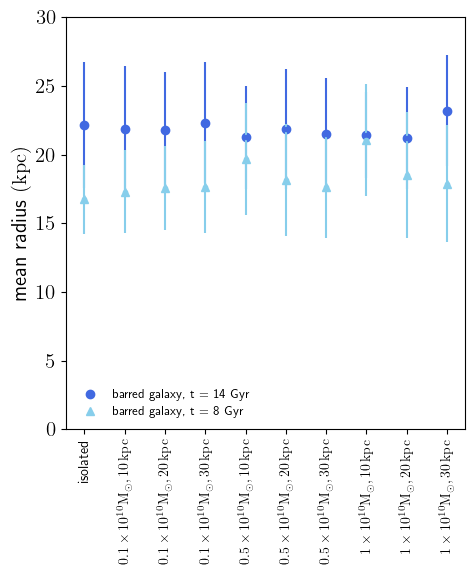

In [71]:
fig, ax = plt.subplots(figsize=(5, 6))

#barrada
m = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r = [22.14, 21.86, 21.82, 22.32, 21.25, 21.85, 21.47, 21.44, 21.21, 23.20]
r_err = [4.58, 4.58, 4.21, 4.39, 3.76, 4.35, 4.12, 3.14, 3.69, 4.05]

r_i = [16.75, 17.29, 17.56, 17.65, 19.67, 18.16, 17.62, 21.08, 18.51, 17.88]
r_i_err = [2.52, 3.02, 3.05, 3.37, 4.05, 4.07, 3.71, 4.07, 4.56, 4.25]

plt.plot(m, r, 'o', color='royalblue', label='barred galaxy, t = 14 Gyr')
plt.errorbar(m, r, yerr=r_err, color='royalblue', fmt='.')
plt.plot(m, r_i, '^', color='skyblue', label='barred galaxy, t = 8 Gyr')
plt.errorbar(m, r_i, yerr=r_i_err, color='skyblue', fmt='.')

plt.ylabel('mean radius $\mathrm{(kpc)}$', fontsize=15)
plt.ylim(0, 30)

# Set number of ticks for x-axis
ax.set_xticks(m)
# Set ticks labels for x-axis
x_ticks_labels = ['isolated', 
                  r'$0.1 \times 10^{10}\mathrm{{M}_\odot}, 10 \, \mathrm{kpc}$',
                  r'$0.1 \times 10^{10}\mathrm{{M}_\odot}, 20 \, \mathrm{kpc}$',
                  r'$0.1 \times 10^{10}\mathrm{{M}_\odot}, 30 \, \mathrm{kpc}$',
                  r'$0.5 \times 10^{10}\mathrm{{M}_\odot}, 10 \, \mathrm{kpc}$',
                  r'$0.5 \times 10^{10}\mathrm{{M}_\odot}, 20 \, \mathrm{kpc}$',
                  r'$0.5 \times 10^{10}\mathrm{{M}_\odot}, 30 \, \mathrm{kpc}$',
                  r'$1 \times 10^{10}\mathrm{{M}_\odot}, 10 \, \mathrm{kpc}$',
                  r'$1 \times 10^{10}\mathrm{{M}_\odot}, 20 \, \mathrm{kpc}$',
                  r'$1 \times 10^{10}\mathrm{{M}_\odot}, 30 \, \mathrm{kpc}$']
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)

plt.legend(frameon=False, fontsize=9, loc='lower left')
plt.tight_layout()
plt.savefig('raios_medios_warp_b.png')

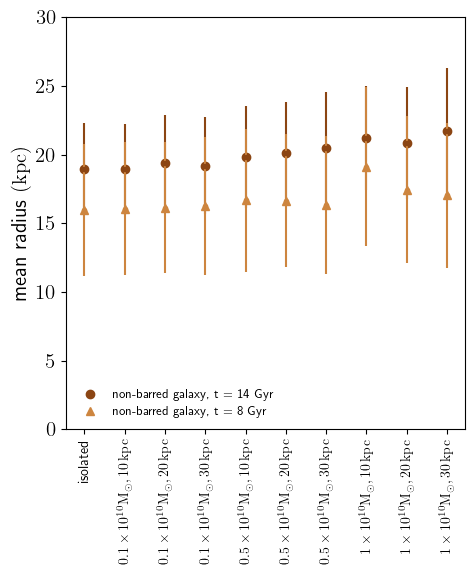

In [72]:
fig, ax = plt.subplots(figsize=(5, 6))

#não barrada
r_nb = [18.96, 18.93, 19.39, 19.20, 19.82, 20.13, 20.50, 21.23, 20.83, 21.70]
r_nb_err = [3.32, 3.32, 3.51, 3.50, 3.73, 3.70, 4.08, 3.79, 4.06, 4.61]

r_i_nb = [15.96, 16.06, 16.13, 16.23, 16.66, 16.65, 16.32, 19.13, 17.43, 17.02]
r_i_nb_err = [4.78, 4.85, 4.76, 5.02, 5.22, 4.85, 5.03, 5.79, 5.35, 5.30]

plt.plot(m, r_nb, 'o', color='saddlebrown', label='non-barred galaxy, t = 14 Gyr')
plt.errorbar(m, r_nb, yerr=r_nb_err, color='saddlebrown', fmt='.')
plt.plot(m, r_i_nb, '^', color='peru', label='non-barred galaxy, t = 8 Gyr')
plt.errorbar(m, r_i_nb, yerr=r_i_nb_err, color='peru', fmt='.')

plt.ylabel('mean radius $\mathrm{(kpc)}$', fontsize=15)
plt.ylim(0, 30)

# Set number of ticks for x-axis
ax.set_xticks(m)
# Set ticks labels for x-axis
x_ticks_labels = ['isolated', 
                  r'$0.1 \times 10^{10}\mathrm{{M}_\odot}, 10 \, \mathrm{kpc}$',
                  r'$0.1 \times 10^{10}\mathrm{{M}_\odot}, 20 \, \mathrm{kpc}$',
                  r'$0.1 \times 10^{10}\mathrm{{M}_\odot}, 30 \, \mathrm{kpc}$',
                  r'$0.5 \times 10^{10}\mathrm{{M}_\odot}, 10 \, \mathrm{kpc}$',
                  r'$0.5 \times 10^{10}\mathrm{{M}_\odot}, 20 \, \mathrm{kpc}$',
                  r'$0.5 \times 10^{10}\mathrm{{M}_\odot}, 30 \, \mathrm{kpc}$',
                  r'$1 \times 10^{10}\mathrm{{M}_\odot}, 10 \, \mathrm{kpc}$',
                  r'$1 \times 10^{10}\mathrm{{M}_\odot}, 20 \, \mathrm{kpc}$',
                  r'$1 \times 10^{10}\mathrm{{M}_\odot}, 30 \, \mathrm{kpc}$']
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=10)

plt.legend(frameon=False, fontsize=9, loc='lower left')
plt.tight_layout()
plt.savefig('raios_medios_warp_nb.png')